# Medical Data Visualizer

In [ ]:
%pip install pandas
%pip install seaborn
%pip install matplotlib
%pip install numpy

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [20]:
def calculate_overweight(row):
    bmi = row['weight'] / (row['height'] / 100) ** 2
    if bmi > 25:
         return 1
    else:
         return 0

In [24]:
def normalize_cholesterol(row):
    cholesterol = row['cholesterol']
    if(cholesterol > 1):
        return 1;
    else:
        return 0;

In [25]:
def normalize_gluc(row):
    gluc = row['gluc']
    if(gluc > 1):
        return 1;
    else:
        return 0;

In [26]:
df = pd.read_csv('data/medical_examination.csv')
df['overweight'] = df.apply(calculate_overweight, axis=1)
df['cholesterol'] = df.apply(normalize_cholesterol, axis=1)
df['gluc'] = df.apply(normalize_gluc, axis=1)

#### Data description:

In [27]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


#### Data info:

In [28]:
df.describe()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,0.251643,0.150300,0.088129,0.053771,0.803729,0.499700,0.622086
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.433960,0.357368,0.283484,0.225568,0.397179,0.500003,0.484870
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


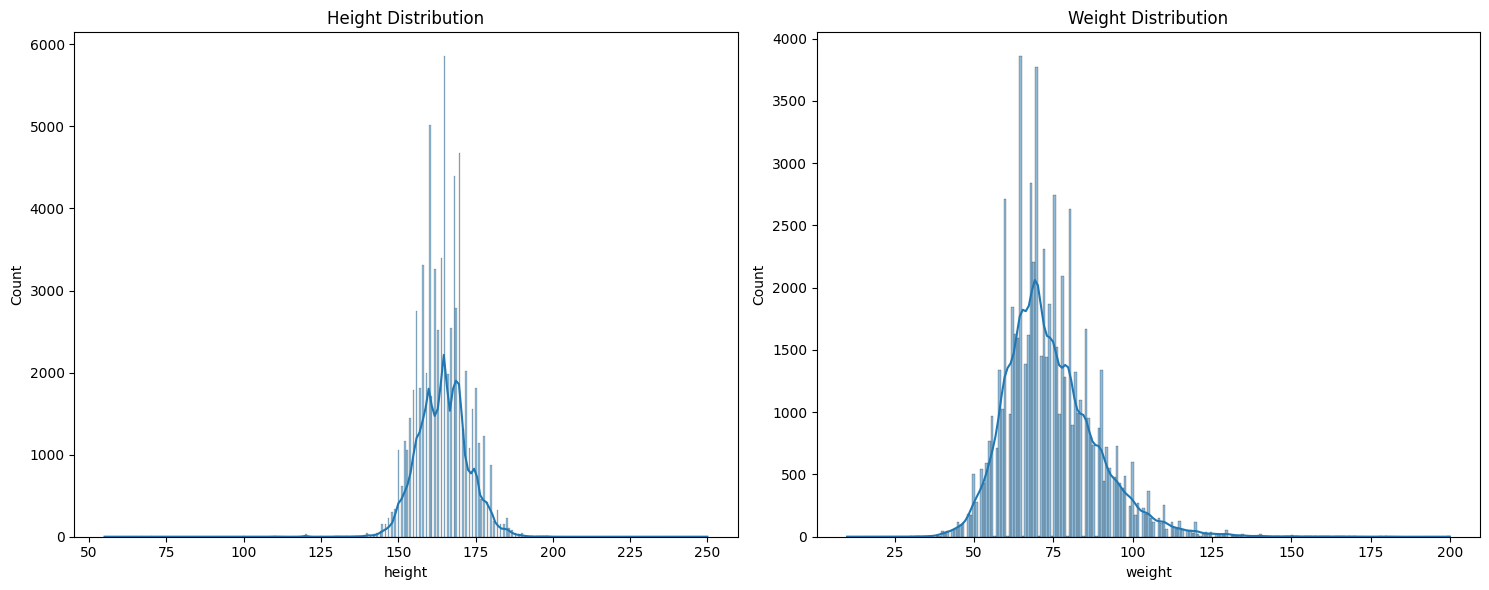

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.histplot(df['height'], kde=True, ax=axes[0]).set(title='Height Distribution')
sns.histplot(df['weight'], kde=True, ax=axes[1]).set(title='Weight Distribution')

plt.tight_layout()
plt.show()

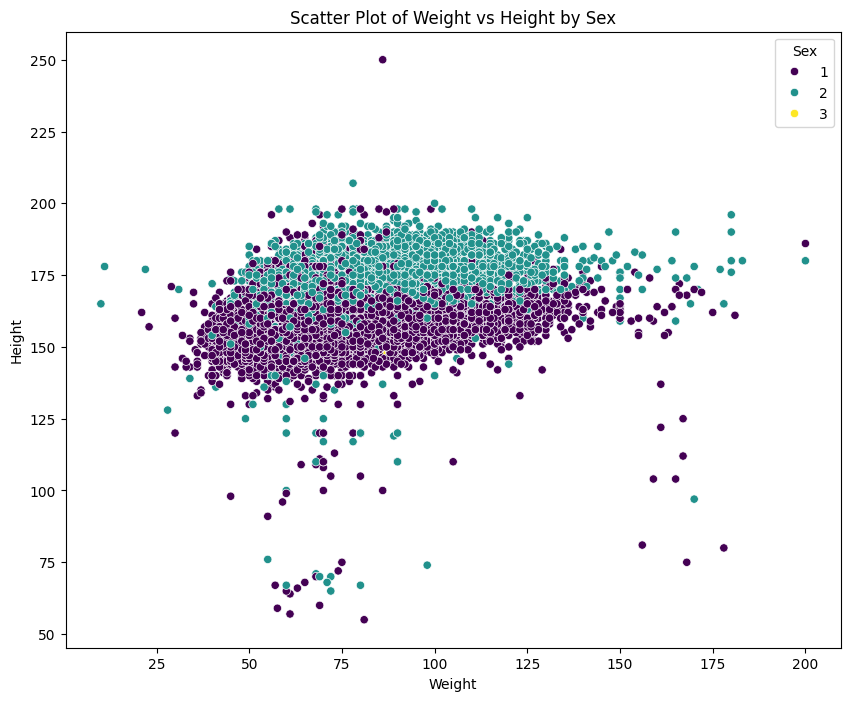

In [56]:
plt.figure(figsize=(10, 8))

sns.scatterplot(x='weight', y='height', hue='sex', data=df, palette='viridis')

plt.xlabel('Weight')
plt.ylabel('Height')

plt.legend(title='Sex')

plt.title('Scatter Plot of Weight vs Height by Sex')
plt.show()